## Cancer classification project
Looking at a small dataset of tumors, I will do some basic EDA and creating and training a neural network to classify whether a tumor is malignant or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('dark')

In [2]:
df = pd.read_csv('../../../TensorFlow_FILES/TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

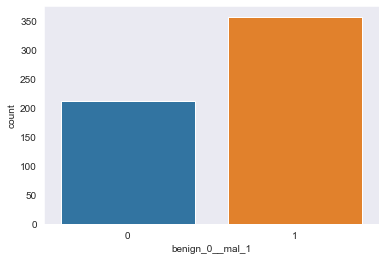

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

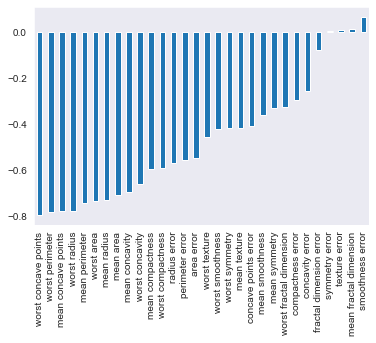

In [12]:
#Correlations (minus itself)
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

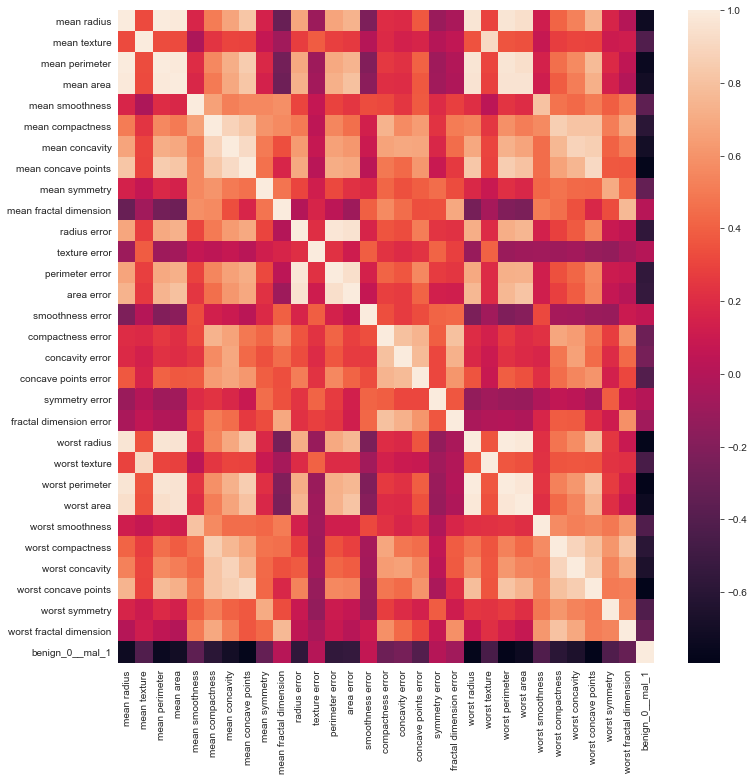

In [18]:
#Heatmap with all variables - not very easy to tell what's going on
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [27]:
#Preprocessing
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

In [32]:
from tensorflow.keras.models import Sequentialuential

In [33]:
from tensorflow.keras.layers import Dense,Dropout

In [34]:
X_train.shape

(426, 30)

In [35]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary classification - sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 2s 33ms/step - loss: 0.6754 - val_loss: 0.6617
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6471 - val_loss: 0.6347
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6155 - val_loss: 0.5994
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5796 - val_loss: 0.5591
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5360 - val_loss: 0.5139
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4873 - val_loss: 0.4584
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4354 - val_loss: 0.4066
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3877 - val_loss: 0.3632
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3477 - val_loss: 0.3204
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3215 - val_loss: 0.2916
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0548 - val_loss: 0.1137
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0554 - val_loss: 0.1086
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0546 - val_loss: 0.1078
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0555 - val_loss: 0.1115
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0534 - val_loss: 0.1075
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0540 - val_loss: 0.1167
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0542 - val_loss: 0.1089
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0526 - val_loss: 0.1140
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0543 - val_loss: 0.1129
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0530 - val_loss: 0.1179


14/14 [==============================] - 0s 8ms/step - loss: 0.0429 - val_loss: 0.1109
Epoch 165/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0415 - val_loss: 0.1237
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0421 - val_loss: 0.1223
Epoch 167/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0420 - val_loss: 0.1083
Epoch 168/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0435 - val_loss: 0.1195
Epoch 169/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0463 - val_loss: 0.1181
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0428 - val_loss: 0.1163
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0417 - val_loss: 0.1199
Epoch 172/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0433 - val_loss: 0.1110
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0402 - val_loss: 0.1250
Epo

14/14 [==============================] - 0s 6ms/step - loss: 0.0391 - val_loss: 0.1211
Epoch 246/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0335 - val_loss: 0.1137
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 0.1290
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0326 - val_loss: 0.1134
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0380 - val_loss: 0.1389
Epoch 250/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0341 - val_loss: 0.1187
Epoch 251/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0354 - val_loss: 0.1348
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0343 - val_loss: 0.1259
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0335 - val_loss: 0.1168
Epoch 254/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0344 - val_loss: 0.1392
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.1343
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.1357
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0294 - val_loss: 0.1430
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0270 - val_loss: 0.1377
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.1438
Epoch 331/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0273 - val_loss: 0.1362
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0288 - val_loss: 0.1361
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0277 - val_loss: 0.1442
Epoch 334/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0287 - val_loss: 0.1304
Epoch 335/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0314 - val_loss: 0.1647
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.1788
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.1475
Epoch 409/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0251 - val_loss: 0.1554
Epoch 410/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0202 - val_loss: 0.1560
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0215 - val_loss: 0.1662
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0224 - val_loss: 0.1641
Epoch 413/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0203 - val_loss: 0.1484
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.1564
Epoch 415/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0210 - val_loss: 0.1671
Epoch 416/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.1630
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.2160
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.1903
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0181 - val_loss: 0.1847
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0172 - val_loss: 0.1963
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0155 - val_loss: 0.2007
Epoch 493/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.2080
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.1870
Epoch 495/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.2095
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.2103
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0189 - val_loss: 0.1832
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.2264
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.2276
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0111 - val_loss: 0.2428
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.2342
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 0.2300
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.2357
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.2276
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0123 - val_loss: 0.2835
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.2082
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0168 - val_loss: 0.3007
Epoc

In [38]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

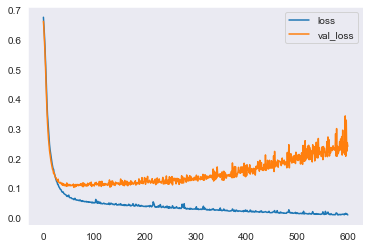

In [39]:
#Clear trend of overfitting
losses.plot()

In [40]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [43]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 27ms/step - loss: 0.6534 - val_loss: 0.6312
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6123 - val_loss: 0.5942
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5740 - val_loss: 0.5530
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5284 - val_loss: 0.5016
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4739 - val_loss: 0.4391
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4156 - val_loss: 0.3838
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3648 - val_loss: 0.3316
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3194 - val_loss: 0.2875
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2837 - val_loss: 0.2546
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2572 - val_loss: 0.2294
Epoch 11

<AxesSubplot:>

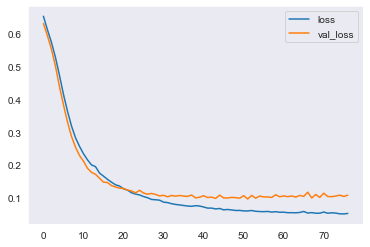

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [46]:
#Dropout to reduce overfitting
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [47]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 25ms/step - loss: 0.6822 - val_loss: 0.6645
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6781 - val_loss: 0.6501
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6619 - val_loss: 0.6349
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6421 - val_loss: 0.6146
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6412 - val_loss: 0.5947
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6190 - val_loss: 0.5739
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6001 - val_loss: 0.5593
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5816 - val_loss: 0.5409
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5700 - val_loss: 0.5158
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5347 - val_loss: 0.4925
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1215 - val_loss: 0.0857
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1258 - val_loss: 0.0846
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1308 - val_loss: 0.0938
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1386 - val_loss: 0.0997
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1287 - val_loss: 0.0852
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1260 - val_loss: 0.0925
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.0965
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1193 - val_loss: 0.0847
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1173 - val_loss: 0.0832
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1174 - val_loss: 0.0907


<AxesSubplot:>

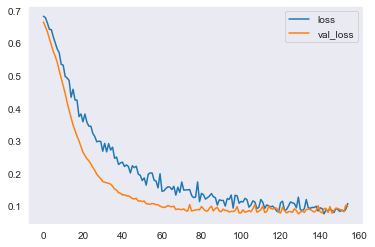

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [51]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]


In [56]:
#Given a relatively small dataset, this network did pretty well
#after adding early stop callback and dropout